In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def plot_sample(x,y,index):
  plt.figure(figsize=(12,2))
  plt.imshow(x[index])
  plt.xlabel(y[index])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


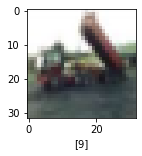

In [8]:
plot_sample(X_train,Y_train,2)

In [9]:
#Normalization

X_train = X_train/255
X_test = X_test/255

In [10]:
cnn = models.Sequential([layers.Conv2D(filters = 32, activation = 'relu', kernel_size = (3,3), input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         
                         layers.Conv2D(filters = 32, activation = 'relu', kernel_size = (3,3), input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         #Classification
                         layers.Flatten(),
                         layers.Dense(64, activation = 'relu'),
                         layers.Dense(10, activation = 'softmax' )
                         ])

In [11]:
cnn.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #sparse categorical, o/p names as 1,2 3,..,10 for if no. of classes=10

In [17]:
cnn.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.4253 - accuracy: 0.8520
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.4145 - accuracy: 0.8565
Epoch 3/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.4048 - accuracy: 0.8581
Epoch 4/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.3910 - accuracy: 0.8637
Epoch 5/5
1563/1563 [==============================] - 48s 31ms/step - loss: 0.3842 - accuracy: 0.8659


In [18]:
y_pred=cnn.predict(X_test)

In [19]:
Y_test=Y_test.reshape(-1,)
y_pred=cnn.predict(X_test)

In [20]:
y_classes=[np.argmax(element) for element in y_pred]
print("Classification report:\n",classification_report(Y_test,y_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70      1000
           1       0.84      0.72      0.78      1000
           2       0.52      0.64      0.57      1000
           3       0.56      0.46      0.50      1000
           4       0.60      0.63      0.62      1000
           5       0.70      0.42      0.53      1000
           6       0.74      0.78      0.76      1000
           7       0.61      0.81      0.70      1000
           8       0.83      0.73      0.78      1000
           9       0.68      0.81      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

